In [41]:
import os
os.getcwd()

'/home/edureka'

In [1]:
import pandas as pd
data = pd.read_csv('Data.csv')
print(data.shape)
data.head()

(10000, 8)


,asia,tub,smoke,lung,bronc,either,xray,dysp
0,no,no,no,no,no,no,no,yes
1,no,no,yes,no,no,no,no,no
2,no,no,no,no,no,no,no,no
3,no,no,yes,no,no,no,no,no
4,no,no,yes,no,yes,no,no,yes


In [2]:
from pgmpy.models import BayesianModel
col_list = [('asia', 'tub'),('tub', 'either'),('either', 'xray'),('either', 'dysp'),\
            ('lung', 'either'),('smoke', 'lung'),('smoke', 'bronc'),('bronc', 'dysp')]
model=BayesianModel(col_list)

In [3]:
model.nodes()

NodeView(('asia', 'tub', 'either', 'xray', 'dysp', 'lung', 'smoke', 'bronc'))

In [4]:
model.edges()

OutEdgeView([('asia', 'tub'), ('tub', 'either'), ('either', 'xray'), ('either', 'dysp'), ('lung', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('bronc', 'dysp')])

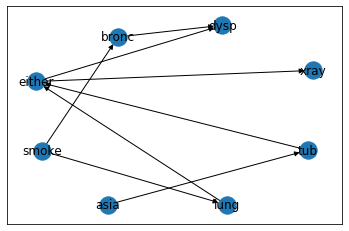

In [6]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_networkx(model)
plt.show()

In [7]:
from pgmpy.estimators import MaximumLikelihoodEstimator
estimator =MaximumLikelihoodEstimator(model,data)
estimator.get_parameters()

[<TabularCPD representing P(asia:2) at 0x7f14845b0cc0>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7f1483de9550>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7f1483dc99b0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7f1483d23f98>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7f1483d9d5f8>,
 <TabularCPD representing P(smoke:2) at 0x7f1483d23f60>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7f1483d4c6a0>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7f1483d4c0f0>]

In [8]:
cpd_A =estimator.estimate_cpd('asia')
cpd_t =estimator.estimate_cpd('tub')
cpd_s =estimator.estimate_cpd('smoke')
cpd_l =estimator.estimate_cpd('lung')
cpd_b =estimator.estimate_cpd('bronc')
cpd_e =estimator.estimate_cpd('either')
cpd_x =estimator.estimate_cpd('xray')
cpd_d =estimator.estimate_cpd('dysp')
#print(cpd_A)

model.add_cpds(cpd_A,cpd_t,cpd_s,cpd_l,cpd_b,cpd_e ,cpd_x ,cpd_d)
model.get_cpds()

[<TabularCPD representing P(asia:2) at 0x7f1483d4cbe0>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7f14834d7ac8>,
 <TabularCPD representing P(smoke:2) at 0x7f1487118470>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7f1484cffac8>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7f1483d23ef0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7f1484d0a4a8>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7f1484cffa90>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7f14f6da34e0>]

In [9]:
for cpd in model.get_cpds():
    print(cpd)

+-----------+--------+
| asia(no)  | 0.9908 |
+-----------+--------+
| asia(yes) | 0.0092 |
+-----------+--------+
+----------+----------------------+----------------------+
| asia     | asia(no)             | asia(yes)            |
+----------+----------------------+----------------------+
| tub(no)  | 0.9901090028259992   | 0.9565217391304348   |
+----------+----------------------+----------------------+
| tub(yes) | 0.009890997174000807 | 0.043478260869565216 |
+----------+----------------------+----------------------+
+------------+--------+
| smoke(no)  | 0.5046 |
+------------+--------+
| smoke(yes) | 0.4954 |
+------------+--------+
+-----------+---------------------+---------------------+
| smoke     | smoke(no)           | smoke(yes)          |
+-----------+---------------------+---------------------+
| lung(no)  | 0.9892984542211652  | 0.9027048849414614  |
+-----------+---------------------+---------------------+
| lung(yes) | 0.01070154577883472 | 0.09729511505853855 |
+---

In [10]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [11]:
#query 1
print(infer.query(['tub'],evidence={'smoke': 'yes', 'dysp': 'no'}))
#query 2
print(infer.query(['xray'],evidence={'lung': 'yes', 'asia': 'yes'}))
#query 3
print(infer.query(['bronc'],evidence={'dysp': 'yes', 'asia': 'yes','either':'no'}))

Eliminating: dysp:   0%|          | 0/5 [00:00<?, ?it/s] 

+----------+------------+
| tub      |   phi(tub) |
+==========+============+
| tub(no)  |     0.9960 |
+----------+------------+
| tub(yes) |     0.0040 |
+----------+------------+


Eliminating: smoke: 100%|██████████| 4/4 [00:00<00:00, 39.90it/s]

+-----------+-------------+
| xray      |   phi(xray) |
+===========+=============+
| xray(no)  |      0.0190 |
+-----------+-------------+
| xray(yes) |      0.9810 |
+-----------+-------------+
+------------+--------------+
| bronc      |   phi(bronc) |
+============+==============+
| bronc(no)  |       0.1300 |
+------------+--------------+
| bronc(yes) |       0.8700 |
+------------+--------------+


In [12]:
# Map query
print(infer.map_query(['tub'],evidence={'smoke':'yes','dysp':'no'}))
print(infer.map_query(['xray'],evidence={'asia':'yes','lung':'yes'}))
print(infer.map_query(['bronc'],evidence={'dysp':'yes','asia':'yes','either':'no'}))

Eliminating: smoke:  20%|██        | 1/5 [00:00<00:00,  9.98it/s]

{'tub': 'no'}


Eliminating: smoke: 100%|██████████| 4/4 [00:00<00:00, 40.44it/s]


{'xray': 'yes'}
{'bronc': 'yes'}
